# Import libraries

In [1]:
import os
os.chdir('D:\Study\Excel')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# load data

In [2]:
df = pd.read_excel('BMW 2010-24.xlsx')
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_INR,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,8244790.0,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,6614786.5,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,9457627.5,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,5091078.5,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,4166483.0,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,3584822.0,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,4067619.0,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,3851521.0,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,4890261.0,9486,High


In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_INR,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,8244790.0,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,6614786.5,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,9457627.5,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,5091078.5,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,4166483.0,3080,Low


In [4]:
df.tail()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_INR,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,3584822.0,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,4067619.0,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,3851521.0,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,4890261.0,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,6470582.0,1764,Low


In [5]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_INR               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [6]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_INR,Sales_Volume
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,2017.015700,3.247180,100307.203140,6.265389e+06,5067.514680
std,4.324459,1.009078,57941.509344,2.170854e+06,2856.767125
min,2010.000000,1.500000,3.000000,2.505000e+06,100.000000
25%,2013.000000,2.400000,50178.000000,4.378302e+06,2588.000000
50%,2017.000000,3.200000,100388.500000,6.263460e+06,5087.000000
75%,2021.000000,4.100000,150630.250000,8.151959e+06,7537.250000
max,2024.000000,5.000000,199996.000000,1.001983e+07,9999.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_INR             50000 non-null  float64
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 4.2+ MB


In [8]:
df["Price_INR"].head(10)

0    8244790.0
1    6614786.5
2    9457627.5
3    5091078.5
4    4166483.0
5    3584321.0
6    4597844.0
7    8581963.0
8    9726247.0
9    8037459.5
Name: Price_INR, dtype: float64

# EDA

# Sales volume distribution

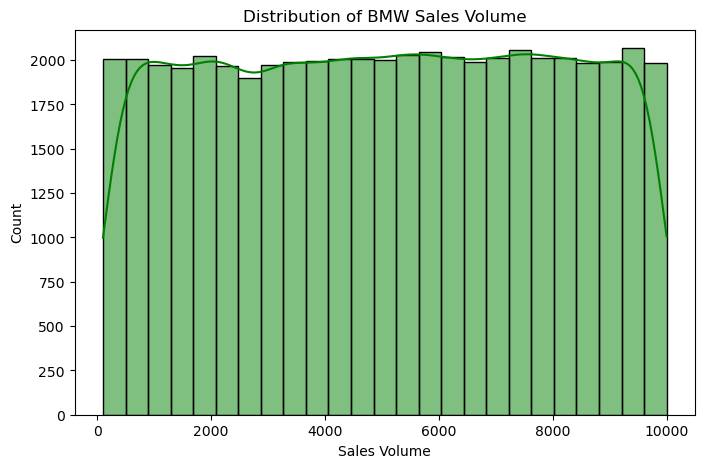

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales_Volume"], bins=25, kde=True, color="green")
plt.title("Distribution of BMW Sales Volume")
plt.xlabel("Sales Volume")
plt.ylabel("Count")
plt.show()

# Sales by Year

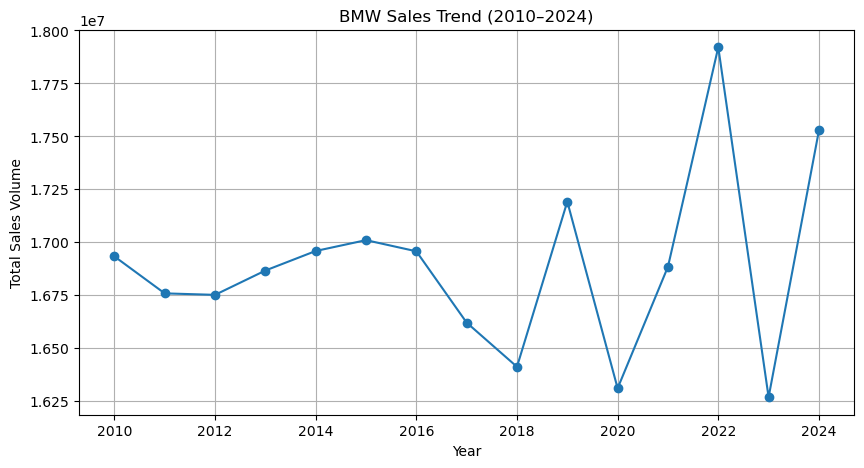

In [10]:
sales_by_year = df.groupby("Year")["Sales_Volume"].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o")
plt.title("BMW Sales Trend (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.grid(True)
plt.show()


# Most Popular BMW Models

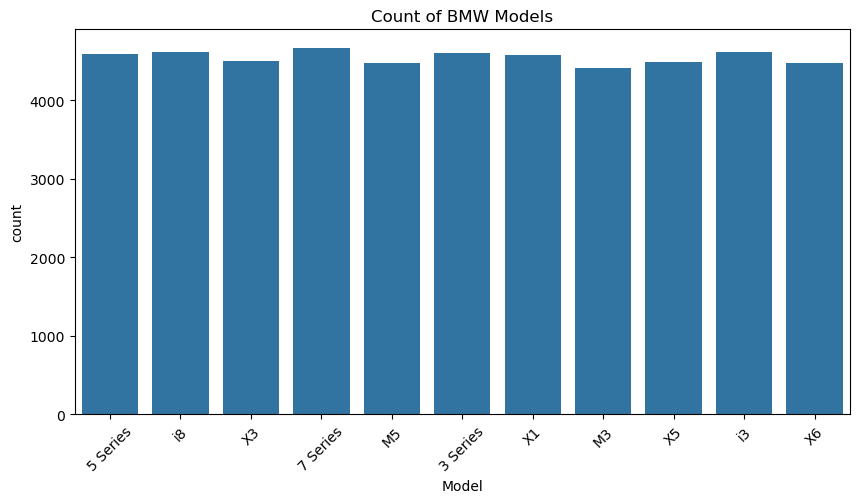

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Model")
plt.title("Count of BMW Models")
plt.xticks(rotation=45)
plt.show()

# Region-wise Sales

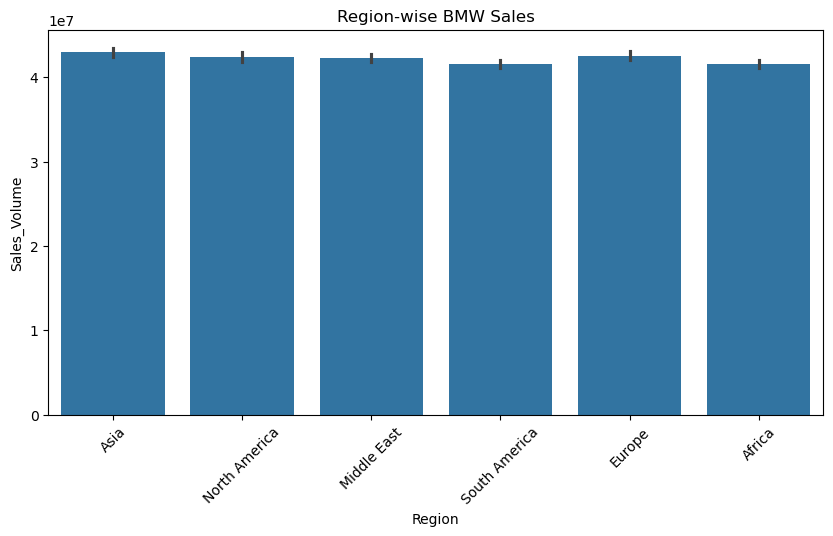

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Region", y="Sales_Volume", estimator=sum)
plt.title("Region-wise BMW Sales")
plt.xticks(rotation=45)
plt.show()

# Fuel Type Preference

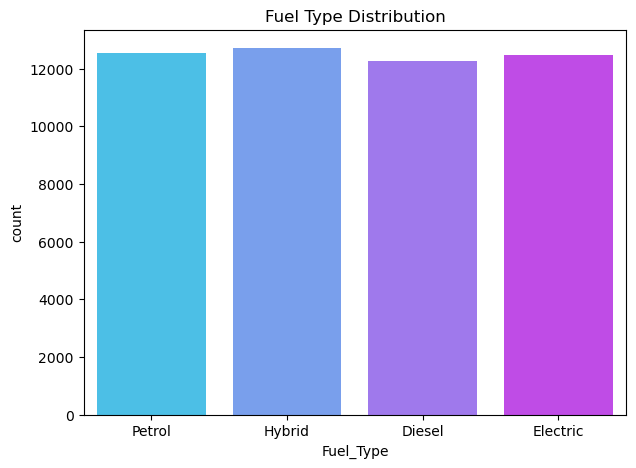

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Fuel_Type", palette="cool")
plt.title("Fuel Type Distribution")
plt.show()

# Correlation Heatmap

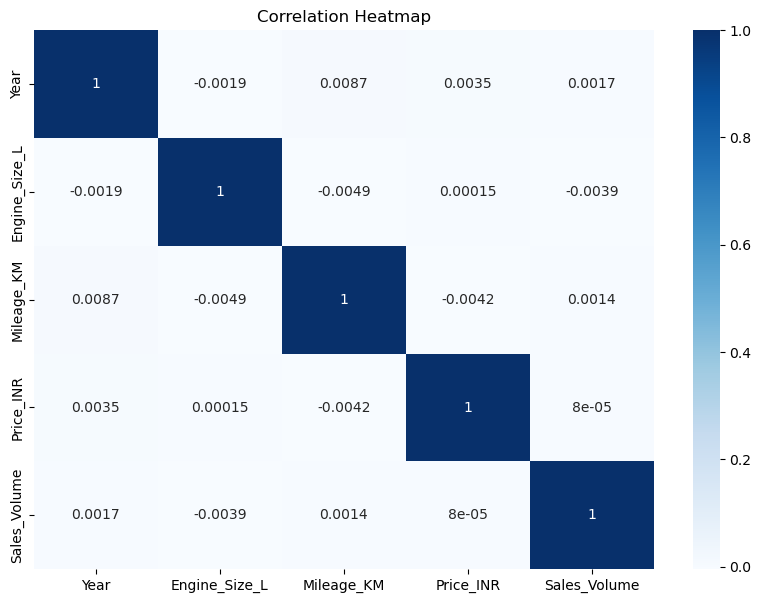

In [14]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [15]:
df["Car_Age"] = 2024 - df["Year"]
df["Car_Age"].head()

0     8
1    11
2     2
3     0
4     4
Name: Car_Age, dtype: int64

In [16]:
df["Price_per_KM"] = df["Price_INR"] / df["Mileage_KM"]
df["Price_per_KM"].replace([np.inf, -np.inf], np.nan, inplace=True)
df["Price_per_KM"].fillna(df["Price_per_KM"].median(), inplace=True)

In [17]:
def engine_category(engine):
    if engine < 2.0:
        return "Small"
    elif engine < 3.5:
        return "Medium"
    else:
        return "Large"

df["Engine_Category"] = df["Engine_Size_L"].apply(engine_category)
df["Engine_Category"].value_counts()

Engine_Category
Large     22137
Medium    21410
Small      6453
Name: count, dtype: int64

In [18]:
df["High_Demand"] = df["Sales_Classification"].apply(lambda x: 1 if x=="High" else 0)

In [19]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Year,Engine_Size_L,Mileage_KM,Price_INR,Sales_Volume,Car_Age,Price_per_KM,High_Demand,Model_5 Series,Model_7 Series,...,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Sales_Classification_Low,Engine_Category_Medium,Engine_Category_Small
0,2016,3.5,151748,8244790.0,8300,8,54.332116,1,True,False,...,True,False,False,False,False,True,True,False,False,False
1,2013,1.6,121671,6614786.5,3428,11,54.366172,0,False,False,...,True,False,False,False,True,False,False,True,False,True
2,2022,4.5,10991,9457627.5,6994,2,860.488354,0,True,False,...,False,False,False,False,False,True,False,True,False,False
3,2024,1.7,27255,5091078.5,4047,0,186.794295,0,False,False,...,False,False,False,False,False,True,False,True,False,True
4,2020,2.1,122131,4166483.0,3080,4,34.114868,0,False,True,...,False,False,False,False,False,False,True,True,True,False


# Price Prediction

# Prepare Data for ML

In [20]:
df_ml = df_encoded.copy()

In [21]:
y = df_ml["Price_INR"]

In [22]:
X = df_ml.drop(["Price_INR"], axis=1)

# Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred_lr = lr.predict(X_test)

In [26]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", round(mae_lr, 2))
print("MSE:", round(mse_lr, 2))
print("RMSE:", round(rmse_lr, 2))
print("R² Score:", round(r2_lr, 2))

Linear Regression Results:
MAE: 1884859.83
MSE: 4725250930328.09
RMSE: 2173764.23
R² Score: -0.0


# Random Forest Regressor

In [27]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred_rf = rf.predict(X_test)

In [29]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", round(mae_rf, 2))
print("MSE:", round(mse_rf, 2))
print("RMSE:", round(rmse_rf, 2))
print("R² Score:", round(r2_rf, 2))

Random Forest Results:
MAE: 24837.1
MSE: 6589472669.54
RMSE: 81175.57
R² Score: 1.0


# SALES VOLUME PREDICTION

# Prepare Data

In [30]:
df_ml = df_encoded.copy()

In [31]:
y_sales = df_ml["Sales_Volume"]

In [32]:
X_sales = df_ml.drop(["Sales_Volume", "Sales_Classification", "High_Demand"], axis=1, errors='ignore')

# Train-Test Split

In [33]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)

# Linear Regression Model

In [34]:
lr_sales = LinearRegression()
lr_sales.fit(X_train_s, y_train_s)

y_pred_lr_sales = lr_sales.predict(X_test_s)

In [35]:
mae_lr_s = mean_absolute_error(y_test_s, y_pred_lr_sales)
mse_lr_s = mean_squared_error(y_test_s, y_pred_lr_sales)
rmse_lr_s = np.sqrt(mse_lr_s)
r2_lr_s = r2_score(y_test_s, y_pred_lr_sales)

print("Linear Regression - Sales Volume Prediction")
print("MAE:", round(mae_lr_s, 2))
print("RMSE:", round(rmse_lr_s, 2))
print("R²:", round(r2_lr_s, 2))

Linear Regression - Sales Volume Prediction
MAE: 1427.14
RMSE: 1726.44
R²: 0.64


# Random Forest Regressor 

In [36]:
rf_sales = RandomForestRegressor(n_estimators=200, random_state=42)
rf_sales.fit(X_train_s, y_train_s)

y_pred_rf_sales = rf_sales.predict(X_test_s)

In [37]:
mae_rf_s = mean_absolute_error(y_test_s, y_pred_rf_sales)
mse_rf_s = mean_squared_error(y_test_s, y_pred_rf_sales)
rmse_rf_s = np.sqrt(mse_rf_s)
r2_rf_s = r2_score(y_test_s, y_pred_rf_sales)

print("Random Forest - Sales Volume Prediction")
print("MAE:", round(mae_rf_s, 2))
print("RMSE:", round(rmse_rf_s, 2))
print("R²:", round(r2_rf_s, 2))


Random Forest - Sales Volume Prediction
MAE: 1438.91
RMSE: 1748.31
R²: 0.63
